**AUTHOR**:     ERYL KENN VICTORINO  
**PURPOSE**:    PRINCIPAL COMPONENT ANALYSIS (PCA) TUTORIAL  
*from 'Machine Learning A-Z™: Hands-On Python & R In Data Science' on Udemy by Kirill Eremenko, Hadelin de Ponteves, and the SuperDataScience Team*  
**MOD DATE**:   4/20/2019

# IMPORT LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

# IMPORT DATASET

In [2]:
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

# TRAINING/TEST SPLIT

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# FEATURE SCALING

In [4]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# APPLY PCA

>*first apply PCA with "n_components" = None  
then use "explained_variance" to determine how many components you need to explain the variance  
reassign "n_components" with that number, in this case 2*

In [5]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

# LOGISTIC REGRESSION FIT ON TRAINING SET

In [6]:
classifier = LogisticRegression(solver = 'lbfgs', multi_class='auto', random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

# PREDICTION ON TEST SET

In [7]:
y_pred = classifier.predict(X_test)

# CONFUSION MATRIX

In [8]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


# VISUALIZE TRAINING SET

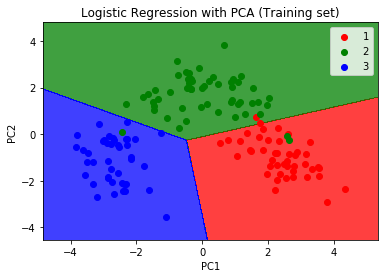

In [9]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = [ListedColormap(('red', 'green', 'blue'))(i)], label = j)
plt.title('Logistic Regression with PCA (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# VISUALIZE TEST SET

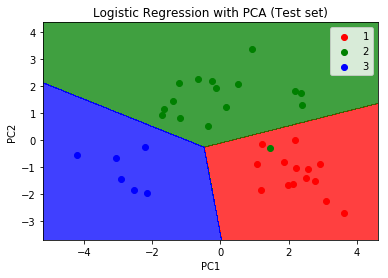

In [10]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = [ListedColormap(('red', 'green', 'blue'))(i)], label = j)
plt.title('Logistic Regression with PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()